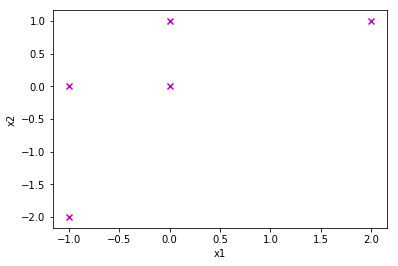

In [1]:
#参考：cs231n
############### 1.准备数据 ############
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[-1,-2],
                 [-1,0],
                 [0,0],
                 [2,1],
                 [0,1]],dtype='float64')

def plotData(x,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    ax = plt.scatter(x, y, marker = 'x', color = 'm')  
    plt.xlabel('x1') 
    plt.ylabel('x2')
    
    plt.show()

plotData(data[:,0],data[:,1])

In [21]:
############# 2.核心算法 ###############
#根据主成份保留比例，计算留下的维度
def ratio_2_dim(eigVals,ratio):
    sortArray=np.sort(eigVals,-1)   #升序
    sortArray=sortArray[-1::-1]     #降序
    arraySum=sum(sortArray)
    tmp=0
    dim_num=0
    for i in sortArray:
        tmp+=i
        dim_num+=1
        if tmp>=arraySum*ratio:
            return dim_num
        
def PCA(data,ratio=0.9):
    #input:m*n
    #ratio:主成分保留占比
    #output:降维后的mat m*redu_dim
    
    data -= np.mean(data,axis=0) #零中心化

    cov = np.dot(data .T, data) / data.shape[0] #协方差矩阵
    
    U,S,V=np.linalg.svd(cov) #U的列是特征向量（降序），S是奇异值的一维数组
    
    U1=U[:,0] 
    #Xrot = np.dot(X,U)  #对数据去除相关性，投影到特征基准
    reduce_dim = ratio_2_dim(S,ratio)
    Xrot_reduce = np.dot(data,U[:,:reduce_dim])
    
    return Xrot_reduce,U1

redu_data,U1 = PCA(data,0.5)
print(redu_data,U1)

[[ 2.12132034]
 [ 0.70710678]
 [ 0.        ]
 [-2.12132034]
 [-0.70710678]] [-0.70710678 -0.70710678]


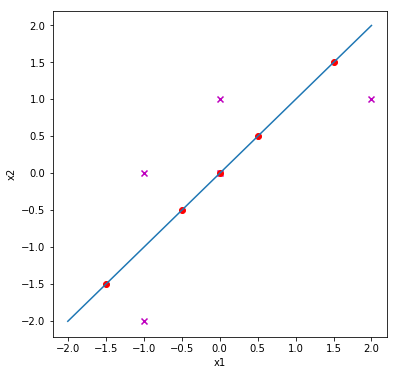

In [36]:
############# 3.打印结果图片 ##########
def plotData2(x,y,redu_data,U1):
    fig = plt.figure()  
    fig.set_size_inches(6, 6) #设置高宽比一样
    
    #原始点
    ax = plt.scatter(x, y, marker = 'x', color = 'm')  

    #第一主成分方向直线
    k = (U1[1]/U1[0])
    plotX = np.arange(-2,3)
    plotY = k*plotX
    plt.plot(plotX,plotY)
    
    #降维后的数据点
    dist = redu_data
    symbol = dist.copy()
    symbol[symbol>=0]=1
    symbol[symbol<0]=-1
    
    dotX = np.sqrt(dist**2/(k**2+1))
    dotX = dotX*symbol
    dotY = k*dotX
    ax2 = plt.scatter(dotX, dotY, marker = 'o', color = 'r') 
    
    plt.xlabel('x1') 
    plt.ylabel('x2')
    plt.show()

plotData2(data[:,0],data[:,1],redu_data[:,0],U1)

#### 结果：
红色圆点为紫色x点垂直的投影点。

即把二维降维到一维了。